## Recurrent Neural Networks (RNNs)

In [15]:
import numpy as np

In [16]:
X = np.array([
    [[0.1, 0.5], [0.2, 0.6], [0.3, 0.7]], 
    [[0.3, 0.7], [0.4, 0.8], [0.5, 0.7]]
])
y = np.array([[0.5], [0.6]])

In [17]:
from keras.models import  Sequential
from keras.layers import SimpleRNN, Dense


LSTM - long-short term memory<br>
GRU - Gated Recurrent Unit

In [18]:
model = Sequential([
    SimpleRNN(10, activation='tanh', input_shape=(3, 2)),
    Dense(1)#, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mse')

c:\Users\rajba\.conda\envs\tech-axis\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
history = model.fit(X, y, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.5490
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 0.5020
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - loss: 0.4573
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - loss: 0.4150
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - loss: 0.3749
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 0.3372
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - loss: 0.3018
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step - loss: 0.2688
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step - loss: 0.2381
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - loss: 0.2096
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - loss: 0.1835
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - loss: 0.1595
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - loss: 0.1376
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step - loss: 0.1178
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1001
Epoch 16/20
1/1 ━━━━━━━━━

In [20]:
history.history.keys()

dict_keys(['loss'])

In [21]:
import matplotlib.pyplot as plt

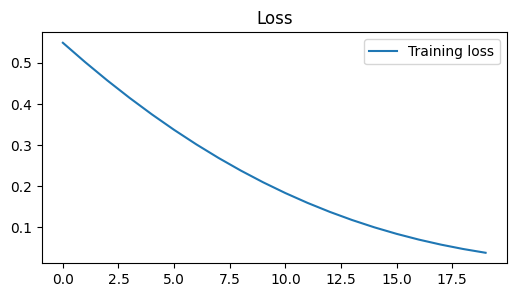

In [22]:
loss = history.history['loss']
plt.figure(figsize=(6, 3))
plt.plot(loss, label='Training loss')
plt.title('Loss')
plt.legend()

In [23]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.7266042],
       [0.6977962]], dtype=float32)

## Timeseries forecasting for weather prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [4]:
from zipfile import ZipFile

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
# unzip
zip_file = ZipFile(zip_path)
zip_file.extractall(path='./data/jena_climate_2009_2016.csv')

13568290/13568290 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
filepath = "D:/Projects/TechAxis/class1/data/jena_climate_2009_2016.csv/jena_climate_2009_2016.csv"

df = pd.read_csv(filepath)
df.head(3)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6


### Data Visualization

C:\Users\rajba\AppData\Local\Temp\ipykernel_2204\1006019160.py:66: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


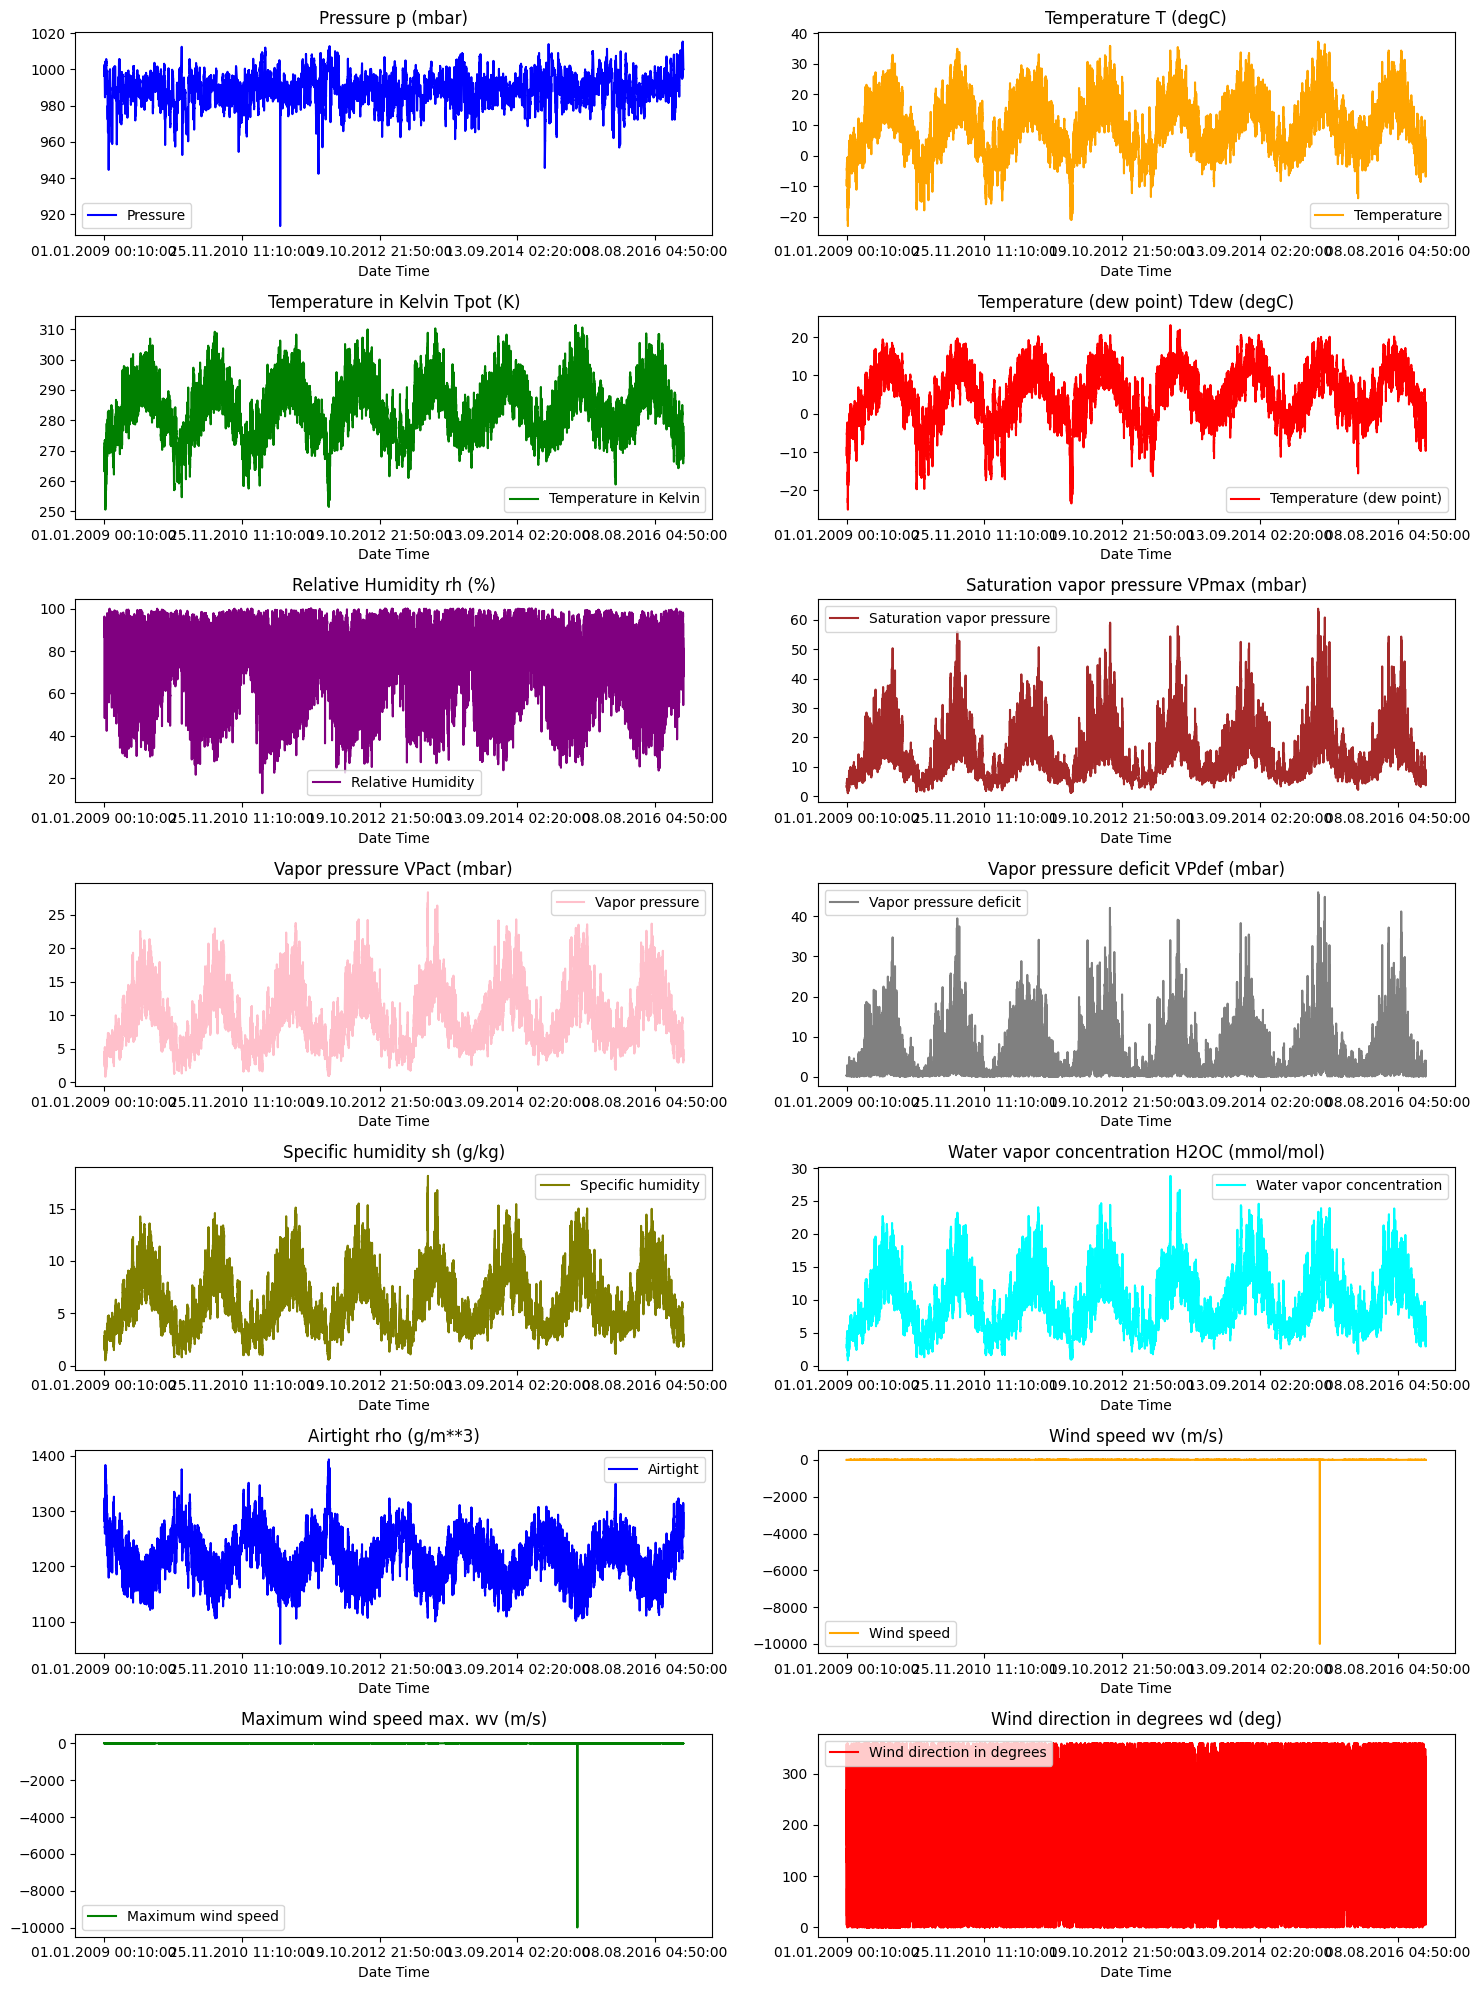

In [4]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"

def visualize_data(data):
    dt = data[date_time_key]
    fig, axes = plt.subplots(7, 2, figsize=(15, 20))

    for i in range(len(feature_keys)):
        column = feature_keys[i]
        color = colors[i % len(colors)]
        t_data = data[column]
        t_data.index = dt
        ax = t_data.plot(
            ax = axes[i // 2, i % 2],
            color=color,
            title=f"{titles[i]} {column}",
            # rot=25
        )
        ax.legend([titles[i]])
    plt.tight_layout()

visualize_data(df)

In [5]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [6]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


In [7]:
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
selected_features

['p (mbar)',
 'T (degC)',
 'VPmax (mbar)',
 'VPdef (mbar)',
 'sh (g/kg)',
 'rho (g/m**3)',
 'wv (m/s)']

In [14]:
features = df[selected_features]
features.index = df[date_time_key]
features.head()

,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s)
Date Time,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,3.33,0.22,1.94,1307.75,1.03
01.01.2009 00:20:00,996.57,-8.41,3.23,0.21,1.89,1309.80,0.72
01.01.2009 00:30:00,996.53,-8.51,3.21,0.20,1.88,1310.24,0.19
01.01.2009 00:40:00,996.51,-8.31,3.26,0.19,1.92,1309.19,0.34
01.01.2009 00:50:00,996.51,-8.27,3.27,0.19,1.92,1309.00,0.32


In [ ]:
features = normalize(features.values, train_split)
features = pd.DataFrame(features, columns=selected_features)
features.head(3)

,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s)
0,0.955451,-2.000020,-1.319782,-0.788479,-1.500927,2.237658,-0.732997
1,0.961528,-2.045185,-1.332806,-0.790561,-1.519521,2.287838,-0.936002
2,0.956666,-2.056766,-1.335410,-0.792642,-1.523239,2.298608,-1.283076


In [16]:
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

In [17]:
start = past + future
end = start + train_split

In [19]:
# x_train = train_data[[i for i in range(7)]].values
x_train = train_data[selected_features].values
x_train

array([[ 0.95545114, -2.00002   , -1.31978162, ..., -1.50092673,
         2.23765845, -0.73299722],
       [ 0.96152792, -2.04518494, -1.33280552, ..., -1.51952063,
         2.28783773, -0.93600233],
       [ 0.9566665 , -2.0567657 , -1.3354103 , ..., -1.52323941,
         2.29860792, -1.28307559],
       ...,
       [-0.11163086,  0.90211719,  0.78097422, ...,  1.39228456,
        -0.92045437, -0.79193419],
       [-0.11770764,  0.89632681,  0.77185748, ...,  1.38856578,
        -0.91653794, -0.79193419],
       [-0.11041551,  0.8639007 ,  0.72757621, ...,  1.39600334,
        -0.88740948, -0.8312255 ]])

In [21]:
y_train = features.iloc[start:end][['T (degC)']]
y_train

,T (degC)
792,-2.745821
793,-2.701814
794,-2.641594
795,-2.597587
796,-2.509573
...,...
301480,0.272124
301481,0.210746
301482,0.264018
301483,0.305708


In [22]:
sequence_length = int(past / step)
sequence_length

120

In [25]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [23]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][selected_features].values
y_val = features.iloc[label_start:][['T (degC)']]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [26]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256, 1)


In [ ]:
model = keras.models.Sequential()
model.add(
    keras.layers.SimpleRNN(
        16, 
        input_shape=((inputs.shape[1], inputs.shape[2])), 
        activation='tanh'
    )
)
model.add(
    keras.layers.Dense(1)
)
model.summary()


c:\Users\rajba\.conda\envs\tech-axis\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 16)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
inputs = keras.layers.Input(
    shape=(inputs.shape[1], inputs.shape[2])
)
x = keras.layers.SimpleRNN(16, activation='tanh')(inputs)
# y = keras.layers.SimpleRNN(32, activation='tanh')(inputs)
outputs = keras.layers.Dense(1)(x)

model_fun = keras.Model(inputs=inputs, outputs=outputs)
model_fun.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 120, 7)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 16)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

path_checkpoint = "./data/model_checkpoint.weights.h5"
modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

In [33]:
model_fun.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

In [35]:
history = model_fun.fit(
    dataset_train,
    epochs=3,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/3
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.0000e+00 - loss: 0.2346
Epoch 1: val_loss improved from inf to 0.17720, saving model to ./data/model_checkpoint.weights.h5
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 136s 116ms/step - accuracy: 0.0000e+00 - loss: 0.2345 - val_accuracy: 0.0000e+00 - val_loss: 0.1772
Epoch 2/3
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0000e+00 - loss: 0.1814
Epoch 2: val_loss improved from 0.17720 to 0.17018, saving model to ./data/model_checkpoint.weights.h5
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 106s 91ms/step - accuracy: 0.0000e+00 - loss: 0.1814 - val_accuracy: 0.0000e+00 - val_loss: 0.1702
Epoch 3/3
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0000e+00 - loss: 0.1696
Epoch 3: val_loss improved from 0.17018 to 0.16830, saving model to ./data/model_checkpoint.weights.h5
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 137s 86ms/step - accuracy: 0.0000e+00 - loss: 0.1696 - val_accuracy: 0.0000e+00 - val_loss: 0.1683


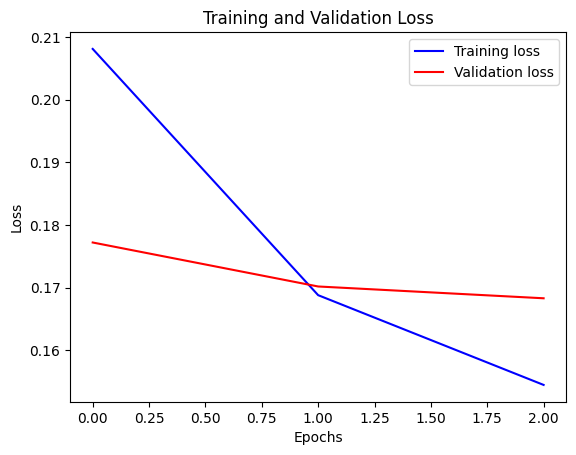

In [36]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


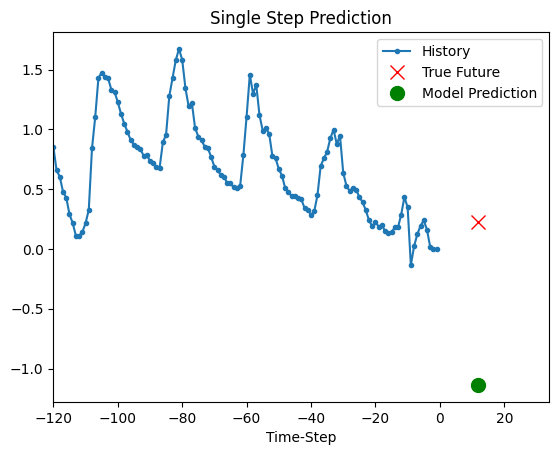

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


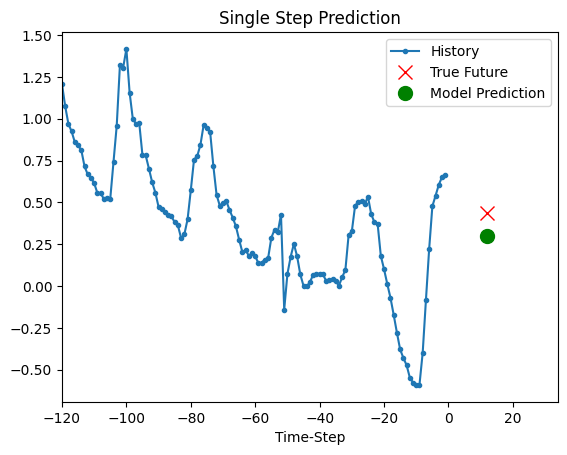

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


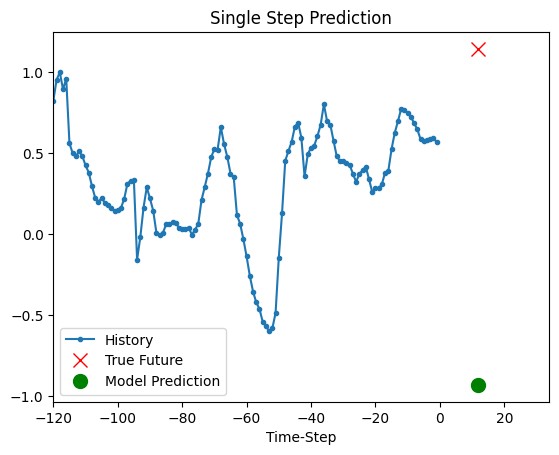

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


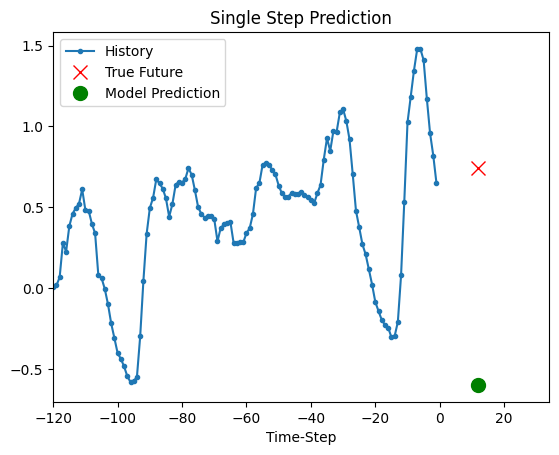

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


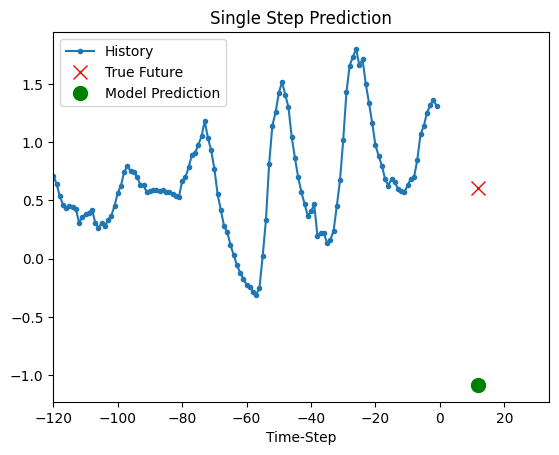

In [37]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()

for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )